### 따릉이 데이터를 활용한 데이터 분석
- 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여 수를 예측

### 1. 라이브러리 및 데이터 불러오기
### Library & Data

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

### 2. 탐색적 자료분석
### Exploratory Data Analysis(EDA)

In [4]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [6]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [14]:
#결측값 확인
print(train.isnull().sum())
print(test.isnull().sum())

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64
id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


In [10]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


<AxesSubplot:xlabel='hour'>

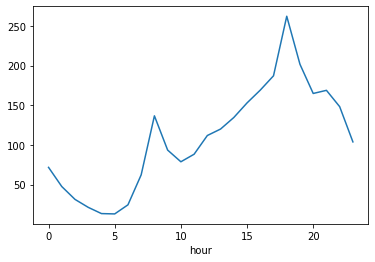

In [38]:
train.groupby('hour').mean()['count'].plot()

Text(18, 240, 'leave work')

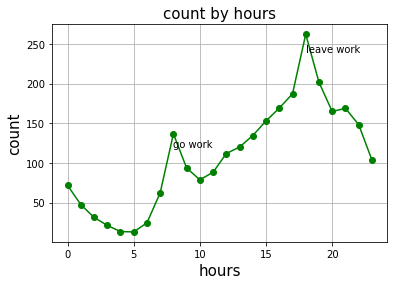

In [47]:
#matplotlib을 활용해 그래프 커스터마이징
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()
plt.title('count by hours', fontsize=15)
plt.xlabel('hours', fontsize=15)
plt.ylabel('count', fontsize=15)

#plt.axvline(8, color = 'r')
#plt.axvline(18, color = 'r')
plt.text(8, 120, 'go work', fontsize = 10)
plt.text(18, 240, 'leave work', fontsize = 10)

<AxesSubplot:>

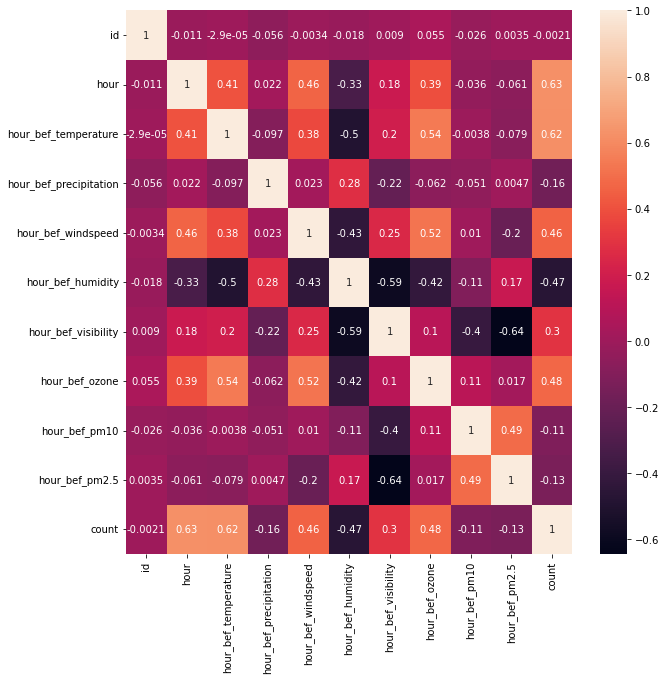

In [57]:
plt.figure(figsize = (10, 10))
sns.heatmap(train.corr(), annot=True)
#count와 상관계수 높은 변수: hour, hour_bef_temperature, hour_bef_windspeed, hour_bef_humidity, hour_bef_ozone 

In [81]:
(abs(train.corr())>0.4)['count']

id                        False
hour                       True
hour_bef_temperature       True
hour_bef_precipitation    False
hour_bef_windspeed         True
hour_bef_humidity          True
hour_bef_visibility       False
hour_bef_ozone             True
hour_bef_pm10             False
hour_bef_pm2.5            False
count                      True
Name: count, dtype: bool

### 3. 데이터 전처리
### Data Cleasing & Pre-Processing

In [76]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

3-1. hour

In [86]:
train[train['hour'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


3-2. hour_bef_temperature

In [87]:
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


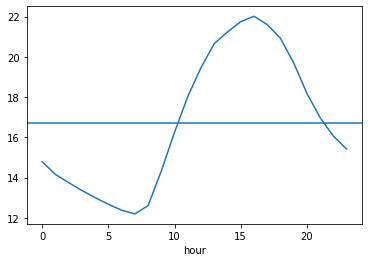

In [89]:
train.groupby('hour').mean()['hour_bef_temperature'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean())
# '시간별 평균 기온'으로 결측치 대치할 경우 오류가 커짐
# 0시의 경우 약 2도, 18시의 경우 무려 약 4도

In [91]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [94]:
train['hour_bef_temperature'].fillna({934: 14.788136, 1035: 20.926667}, inplace=True)
train['hour_bef_temperature'].isna().sum()

0

3-3. hour_bef_windspeed

In [95]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


<AxesSubplot:xlabel='hour'>

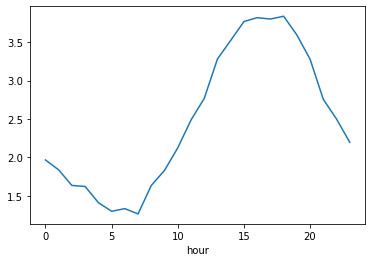

In [96]:
train.groupby('hour').mean()['hour_bef_windspeed'].plot()
#역시 시간에 따른 경향성을 반영해야 함

In [108]:
train['hour_bef_windspeed'] = train['hour_bef_windspeed'].interpolate()
train['hour_bef_windspeed'].isna().sum()

0

3-4. hour_bef_humidity

<AxesSubplot:xlabel='hour'>

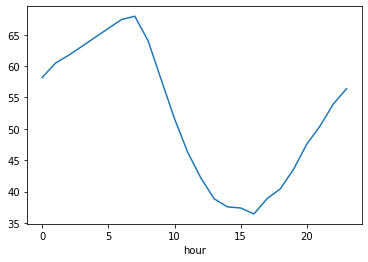

In [104]:
train.groupby('hour')['hour_bef_humidity'].mean().plot()

In [109]:
train['hour_bef_humidity'] = train['hour_bef_humidity'].interpolate()
train['hour_bef_humidity'].isna().sum()

0

3-5. hour_bef_ozone

<AxesSubplot:xlabel='hour'>

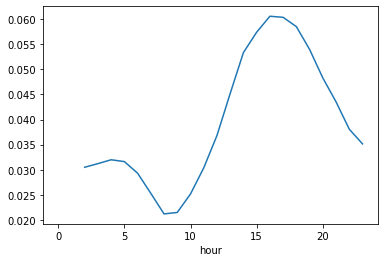

In [111]:
train.groupby('hour')['hour_bef_ozone'].mean().plot()

In [125]:
train['hour_bef_ozone'] = train['hour_bef_ozone'].interpolate()
train['hour_bef_ozone'].isna().sum()

0

In [126]:
test['hour_bef_temperature'] = test['hour_bef_temperature'].interpolate()
test['hour_bef_windspeed'] = test['hour_bef_windspeed'].interpolate()
test['hour_bef_humidity'] = test['hour_bef_humidity'].interpolate()
test['hour_bef_ozone'] = test['hour_bef_ozone'].interpolate()
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        1
hour_bef_ozone             0
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

### 4. 변수 선택 및 모델 구축
### Feature Engineering & Initial Modelling

In [127]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_ozone']
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [128]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 5)
(1459,)
(715, 5)


In [129]:
model = RandomForestRegressor(criterion='mse')

In [131]:
model.fit(X_train, y_train)

RandomForestRegressor(criterion='mse')

In [132]:
model.feature_importances_

array([0.60707873, 0.20592004, 0.04935582, 0.08119634, 0.05644907])

In [147]:
# fisrt 2
X_train_1 = train.drop(['id', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'], axis =1)
# first 3
X_train_2 = train.drop(['id', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'], axis=1)
# first 4
X_train_3 = train.drop(['id', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_visibility', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'], axis=1)


In [150]:
# fisrt 2
test_1 = test.drop(['id', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'], axis =1)
# first 3
test_2 = test.drop(['id', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'], axis=1)
# first 4
test_3 = test.drop(['id', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_visibility', 'hour_bef_pm10', 'hour_bef_pm2.5'], axis=1)

In [151]:
model_1 = RandomForestRegressor(criterion = 'mse')
model_1.fit(X_train_1, y_train)

model_2 = RandomForestRegressor(criterion = 'mse')
model_2.fit(X_train_2, y_train)

model_3 = RandomForestRegressor(criterion = 'mse')
model_3.fit(X_train_3, y_train)

RandomForestRegressor(criterion='mse')

In [152]:
y_pred_1 = model_1.predict(test_1)
y_pred_2 = model_2.predict(test_2)
y_pred_3 = model_3.predict(test_3)

In [154]:
submission_1 = pd.read_csv('submission.csv')
submission_1['count'] = y_pred_1
submission_1.to_csv('sub_1.csv', index=False)

submission_2 = pd.read_csv('submission.csv')
submission_2['count'] = y_pred_2
submission_2.to_csv('sub_2.csv', index=False)

submission_3 = pd.read_csv('submission.csv')
submission_3['count'] = y_pred_3
submission_3.to_csv('sub_3.csv', index=False)